This program calculates the societal impacts of different purchasing decisions made by hospitals. This includes selecting portfolios of products from reusable material (Manufacturing Mode 1) or disposable ones (Manufacturing Mode 2).

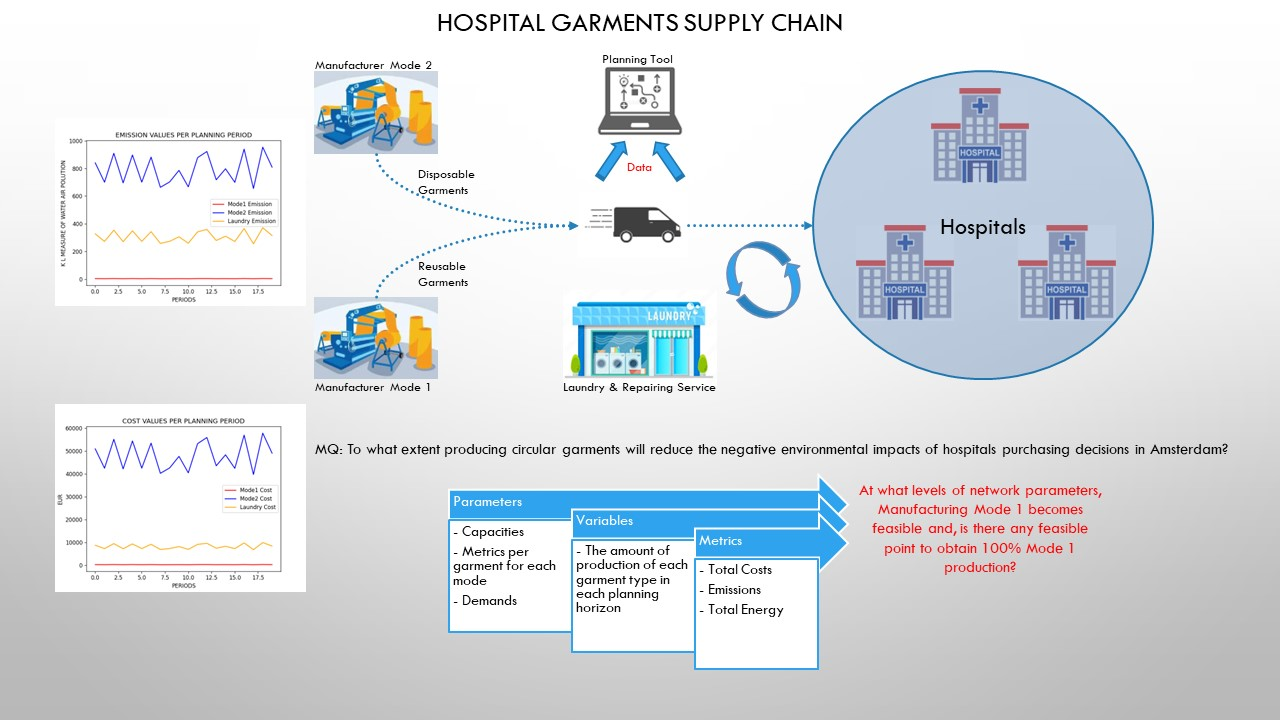


Welcome to the Garment Supply Chain Simulation App
Enter the total number of planning periods as an integer number: 10
Enter the total number of washing times for a Garment as an integer: 80
Enter the emmision amount for washing each garment (kg in 60 degree): 1.5
Enter the energy amount for washing each garment (kWh/kg): 5.5
Enter the total cost amount for washing each garment (EUR/Num): 1
Enter the emission amount for producing each recyclable garment (kg): 1.8
Enter the energy amount for producing each recyclable garment (kWh/kg): 1.5
Enter the cost amount for producing each recyclable garment (EUR/Num): 2
Enter the emission amount for producing each disposable garment (kg): 2.2
Enter the energy amount for producing each disposable garment (kWh/kg): 1.8
Enter the cost amount for producing each disposable garment (EUR/Num): 1
Enter an integer upper-bound for the number of hospitals in a planning horizon: 7
Enter an integer lower-bound for the number of hospitals in a planning horizon

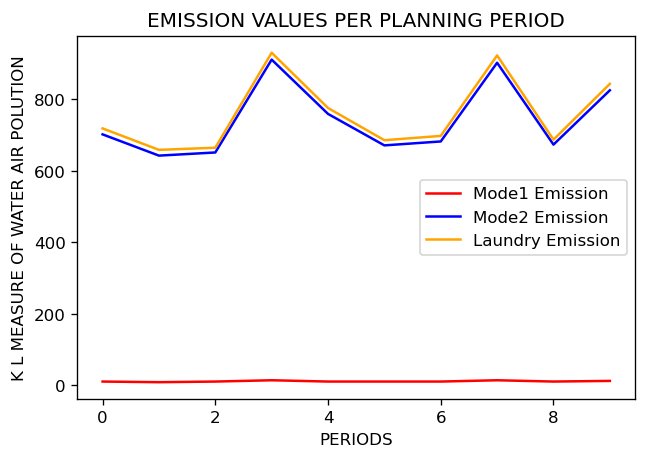

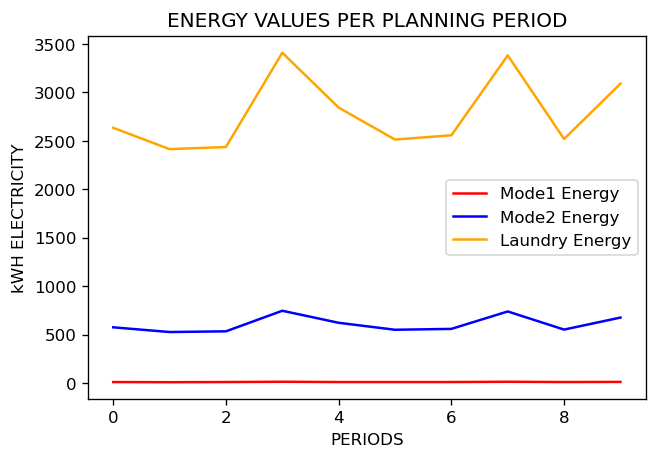

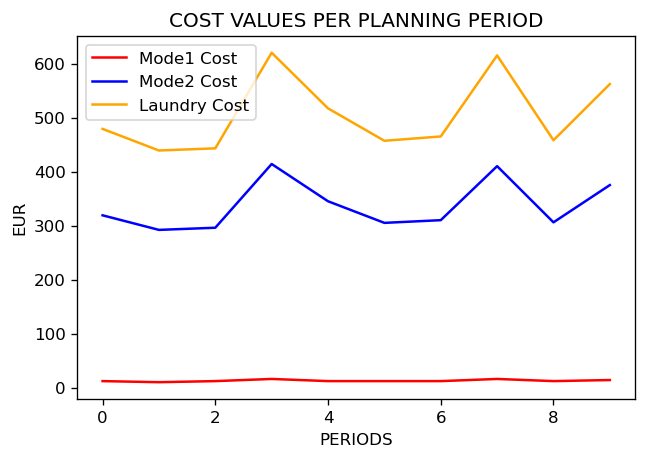

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


print("Welcome to the Garment Supply Chain Simulation App")

total_periods = int(input("Enter the total number of planning periods as an integer number: "))

washing_times = int(input("Enter the total number of washing times for a Garment as an integer: "))

emission_washing_garment=float(input("Enter the emmision amount for washing each garment (kg in 60 degree): "))

energy_washing_garment=float(input("Enter the energy amount for washing each garment (kWh/kg): "))

cost_washing_garment=float(input("Enter the total cost amount for washing each garment (EUR/Num): "))

emission_mode1=float(input("Enter the emission amount for producing each recyclable garment (kg): "))

energy_mode1=float(input("Enter the energy amount for producing each recyclable garment (kWh/kg): "))

cost_mode1=float(input("Enter the cost amount for producing each recyclable garment (EUR/Num): "))

emission_mode2=float(input("Enter the emission amount for producing each disposable garment (kg): "))

energy_mode2=float(input("Enter the energy amount for producing each disposable garment (kWh/kg): "))

cost_mode2=float(input("Enter the cost amount for producing each disposable garment (EUR/Num): "))

hospital_uper=int(input("Enter an integer upper-bound for the number of hospitals in a planning horizon: "))

hospital_lower=float(input("Enter an integer lower-bound for the number of hospitals in a planning horizon: "))

hospital_order_lower=float(input("Enter an integer lower-bound for the number of orders per hospitals in a planning horizon: "))

hospital_order_upper=float(input("Enter an integer upper-bound for the number of orders per hospitals in a planning horizon: "))

mode1_percent=float(input("Enter the share of recyclable products between 1 to 100 percent: "))

class Laundry:
    def __init__(self, period, ordersize):

        self.period = period
        self.ordersize = ordersize
        self.emission = emission_washing_garment*ordersize  # kg in 60 degree
        self.energy = energy_washing_garment*ordersize  # (kWh/kg)
        self.cost = cost_washing_garment*ordersize  # (EUR/Num)

        # waterperorder = 5
        # self.resources = [waterperorder*ordersize]

        # otherperorder = 50
        # self.othercosts = ordersize*otherperorder


class Manufacturer:
    def __init__(self, m_id, cap, period, ordersize, mode):
        self.cap = cap
        self.period = period
        self.ordersize = ordersize
        self.m_id = m_id
        self.mode = mode  # Currently just limited to Two modes
        if mode == 1:
            # Water, emissions to air k l MEASURE OF WATER AIR POLUTION #np.exp(ordersize)
            self.emission = emission_mode1*ordersize
            self.energy = energy_mode1*ordersize
            self.cost = cost_mode1*ordersize  # (EUR/Num)
            # waterperorder = 20  # Water Per Order
            # fabricperorder = 10  # Fabric Per Order
            # self.resources = [fabricperorder *
            #                   ordersize, waterperorder*ordersize]
            # otherperorder = 50  # Other Costs Per Order
            # self.othercosts = ordersize*otherperorder
        else:
            self.emission = emission_mode2*ordersize
            self.energy = energy_mode2*ordersize
            self.cost = cost_mode2*ordersize  # (EUR/Num)
            # waterperorder = 20  # Water Per Order
            # fiberperorder = 10  # Fabric Per Order
            # self.resources = [fiberperorder*ordersize, waterperorder*ordersize]
            # otherperorder = 50  # Other Costs Per Order
            #self.othercosts = ordersize*otherperorder
# Manufacturer(m_id, cap, period, ordersize, mode)



class Supply_Chain:
    def __init__(self, period, number_of_hospitals, hospitals_order_size, number_of_manufacturers, number_of_mode1_manu, caplist, assign_to_mode1):

        self.period = period
        self.hospitalnum = number_of_hospitals
        total_order_size = sum(hospitals_order_size)
        self.ordertotal = total_order_size
        self.number_of_mode1_manu = number_of_mode1_manu
        number_of_mode2_manu = number_of_manufacturers-number_of_mode1_manu
        self.number_of_mode2_manu = number_of_mode2_manu
        assign_to_mode1 = round(total_order_size*assign_to_mode1/100)
        self.assign_to_mode1 = assign_to_mode1
        # Total capacity shouldn't be less than total ordersize
        assign_to_mode2 = total_order_size-assign_to_mode1
        self.assign_to_mode2 = assign_to_mode2
        self.assign = [assign_to_mode1, assign_to_mode2]

        manufacturerlist = []
        for manu in range(number_of_manufacturers):
            if manu < number_of_mode1_manu and assign_to_mode1 > 0:

                manufacturer = Manufacturer(
                    manu, caplist[manu], period, min(caplist[manu], round(assign_to_mode1/washing_times)), 1)

                manufacturerlist.append(manufacturer)

                assign_to_mode1 = assign_to_mode1 - \
                    min(caplist[manu], assign_to_mode1)
               # print(f"Orthers to Manufacturer {manu} assigend")
            elif assign_to_mode2 > 0:
                for manu in range(self.number_of_mode2_manu):

                    manufacturer = Manufacturer(
                        manu, caplist[manu], period, min(caplist[manu+self.number_of_mode1_manu], assign_to_mode2), 2)

                    manufacturerlist.append(manufacturer)
                    assign_to_mode2 = assign_to_mode2 - \
                        min(caplist[manu+self.number_of_mode1_manu],
                            assign_to_mode2)

        self.manufacturer = manufacturerlist

        self.laundry = Laundry(self.period, self.assign_to_mode1 -
                               round(assign_to_mode1/washing_times))
        
        
        

        
        
        
supply_chain = []
data_lst = []
# hospitals_order_size1 = []
for periods in range(total_periods):
    #Supply_Chain(period, number_of_hospitals, hospitals_order_size, number_of_manufacturers, number_of_mode1_manu, caplist, assign_to_mode1)
    number_of_hospitals1 = np.random.randint(hospital_lower, hospital_uper)
    ordersizes=list(np.random.randint(hospital_order_lower, hospital_order_upper, size=number_of_hospitals1))
    sup = Supply_Chain(periods, number_of_hospitals1, list(np.random.randint(
        hospital_order_lower, hospital_order_upper, size=number_of_hospitals1)), 2, 1, [10**10, 10**10], mode1_percent)
    supply_chain.append(sup)
    data_lst.append([periods+1, sup.hospitalnum, sup.ordertotal,
                    sup.manufacturer[0].emission, sup.manufacturer[1].emission, sup.manufacturer[0].energy, sup.manufacturer[1].energy, sup.laundry.emission, sup.laundry.energy, sup.manufacturer[0].cost, sup.manufacturer[1].cost, sup.laundry.cost])


df = pd.DataFrame(data_lst, columns=['Period', "N. Hospitals", "Order Size", "Mode1 Emission",
                  "Mode2 Emission", "Mode1 Energy", "Mode2 Energy", "Laundry Emission", "Laundry Energy", "Mode1 Cost", "Mode2 Cost", "Laundry Cost"])
print(df)

# df.to_csv('file_name.csv')
fig, ax = plt.subplots(dpi=120)
df.plot(kind="line", y="Mode1 Emission", ax=ax, color="red")
df.plot(kind="line", y="Mode2 Emission", ax=ax, color="blue")
df.plot(kind="line", y="Laundry Emission", ax=ax, color="orange")
ax.set_xlabel("PERIODS")
ax.set_ylabel("K L MEASURE OF WATER AIR POLUTION")
plt.title("EMISSION VALUES PER PLANNING PERIOD")
plt.show()

# fig, ax = plt.subplots(dpi=120)
# df.plot(kind="area", y="Mode1 Emission", ax=ax, color="red")
# df.plot(kind="area", y="Mode2 Emission", ax=ax, color="blue")
# df.plot(kind="area", y="Laundry Emission", ax=ax, color="orange")
# ax.set_xlabel("PERIODS")
# ax.set_ylabel("K L MEASURE OF WATER AIR POLUTION")
# plt.title("EMISSION VALUES PER PLANNING PERIOD")
# plt.show()

fig, ax = plt.subplots(dpi=120)
df.plot(kind="line", y="Mode1 Energy", ax=ax, color="red")
df.plot(kind="line", y="Mode2 Energy", ax=ax, color="blue")
df.plot(kind="line", y="Laundry Energy", ax=ax, color="orange")
ax.set_xlabel("PERIODS")
ax.set_ylabel("kWH ELECTRICITY")
plt.title("ENERGY VALUES PER PLANNING PERIOD")
plt.show()

fig, ax = plt.subplots(dpi=120)
df.plot(kind="line", y="Mode1 Cost", ax=ax, color="red")
df.plot(kind="line", y="Mode2 Cost", ax=ax, color="blue")
df.plot(kind="line", y="Laundry Cost", ax=ax, color="orange")
ax.set_xlabel("PERIODS")
ax.set_ylabel("EUR")
plt.title("COST VALUES PER PLANNING PERIOD")
plt.show()